In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def equalize_hist_gray(image):
    """
    그레이스케일 이미지에 대한 히스토그램 평활화 함수.
    PPT에서 제시된 누적분포(cdf)와 alpha = (#pixels / 255)를 이용해 직접 픽셀 매핑을 수행합니다.
    
    Parameters:
      - image: 입력 그레이스케일 이미지 (numpy array, dtype=np.uint8)
    
    Returns:
      - 평활화된 이미지 (numpy array, dtype=np.uint8)
    """
    # 1) 이미지의 모든 픽셀을 1차원 배열로 펼치고, 256구간(0~255)의 히스토그램 계산
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    
    # 2) 히스토그램의 누적분포 함수 (cdf) 계산
    cdf = hist.cumsum()
    
    # 3) alpha = 전체 픽셀 수 / 255
    alpha = image.size / 255.0
    
    # 4) PPT 공식: T(x) = cdf[x] / alpha = cdf[x] * (255 / #pixels)
    #    0~255 범위로 매핑하기 위해 floor 또는 round 후 uint8로 변환
    mapping = np.floor(cdf / alpha).astype(np.uint8)
    
    # 5) 원본 이미지의 각 픽셀을 'mapping' 테이블을 이용해 변환
    #    image[x, y]의 값이 v라면, mapping[v]가 평활화 후 픽셀 값
    equalized_image = mapping[image]
    
    return equalized_image


def equalize_hist_color(image):
    """
    컬러 이미지에 대해 각 채널별로 히스토그램 평활화를 적용하는 함수.
    
    Parameters:
      - image: 입력 컬러 이미지 (numpy array, shape: H x W x 3)
    
    Returns:
      - 각 채널에 대해 평활화한 후 병합한 컬러 이미지 (numpy array)
    """
    # 채널 분리 (예: R, G, B 또는 B, G, R)
    channels = cv2.split(image)
    eq_channels = []
    
    for ch in channels:
        eq = equalize_hist_gray(ch)
        eq_channels.append(eq)
    
    # 채널 병합
    equalized_color = cv2.merge(eq_channels)
    return equalized_color

def display_results(original, equalized, title_original="Original", title_equalized="Equalized", cmap=None):
    """
    원본 이미지와 평활화된 이미지의 결과를 나란히 출력하는 함수.
    
    Parameters:
      - original: 원본 이미지 (numpy array)
      - equalized: 평활화된 이미지 (numpy array)
      - title_original: 원본 이미지 제목 (str)
      - title_equalized: 평활화된 이미지 제목 (str)
      - cmap: 이미지 출력 시 사용할 컬러맵 (예: 'gray' for grayscale)
    """
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap=cmap)
    plt.title(title_original)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(equalized, cmap=cmap)
    plt.title(title_equalized)
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()




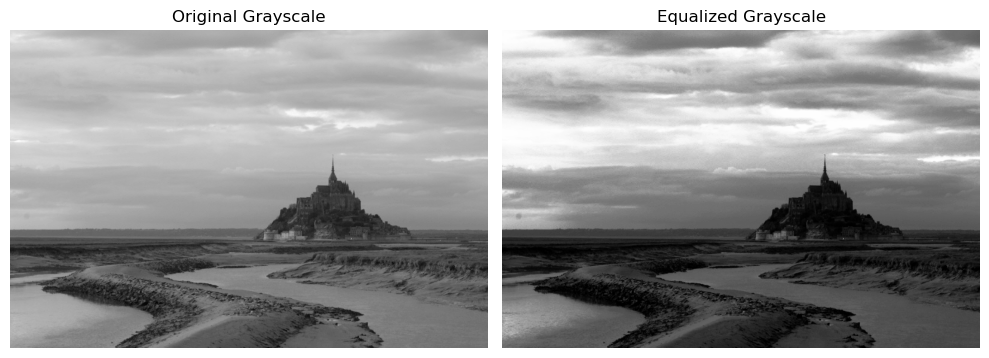

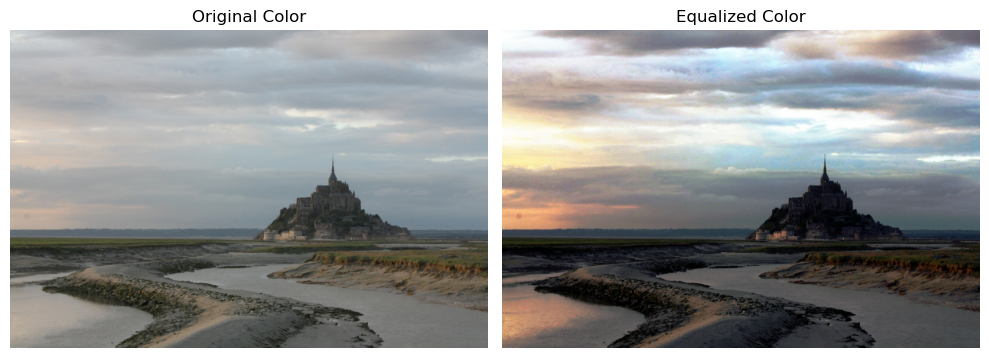

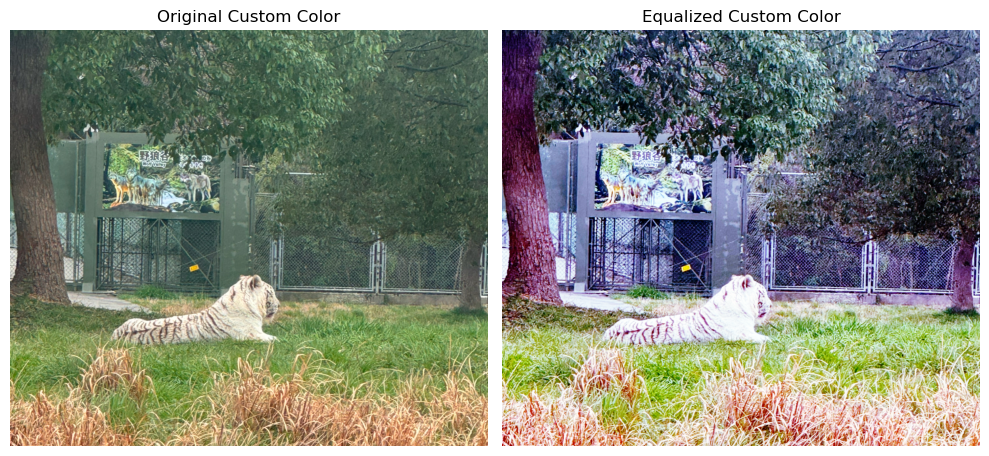

In [6]:
# 메인 코드 영역
if __name__ == "__main__":
    # --- 그레이스케일 이미지 예제 ---
    
    img_gray = 'gray3.jpg'
    img_rgb = 'color3.jpg'
    
    gray_img = cv2.imread(img_gray , cv2.IMREAD_GRAYSCALE)
    if gray_img is None:
        print("그레이스케일 예제 이미지 'gray_example.jpg'를 찾을 수 없습니다.")
    else:
        eq_gray = equalize_hist_gray(gray_img)
        display_results(gray_img, eq_gray, title_original="Original Grayscale", 
                        title_equalized="Equalized Grayscale", cmap="gray")
    
    # --- 컬러 이미지 예제 ---
    color_img_bgr = cv2.imread(img_rgb, cv2.IMREAD_COLOR)
    if color_img_bgr is None:
        print("컬러 예제 이미지 'color_example.jpg'를 찾을 수 없습니다.")
    else:
        # cv2.imread는 BGR 순서로 읽으므로, 보기 편하게 RGB로 변환
        color_img_rgb = cv2.cvtColor(color_img_bgr, cv2.COLOR_BGR2RGB)
        eq_color = equalize_hist_color(color_img_rgb)
        display_results(color_img_rgb, eq_color, title_original="Original Color", 
                        title_equalized="Equalized Color", cmap=None)
    
    # --- 추가 예제 이미지 (자신이 찾은 이미지) ---
    custom_img_bgr = cv2.imread("tiger.jpg", cv2.IMREAD_COLOR)
    if custom_img_bgr is None:
        print("추가 예제 이미지 'custom_image.jpg'를 찾을 수 없습니다.")
    else:
        custom_img_rgb = cv2.cvtColor(custom_img_bgr, cv2.COLOR_BGR2RGB)
        eq_custom = equalize_hist_color(custom_img_rgb)
        display_results(custom_img_rgb, eq_custom, title_original="Original Custom Color", 
                        title_equalized="Equalized Custom Color", cmap=None)